#TITANIC SURVIVAL ANALYSIS

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [3]:
data=pd.read_csv("tested.csv")

In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#Data Preprocessing

{'whiskers': [<matplotlib.lines.Line2D at 0x7ab3b9e43550>,
 'caps': [<matplotlib.lines.Line2D at 0x7ab3b9e43a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ab3b9e432b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ab3b9e43fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ab3b9c942b0>],
 'means': []}

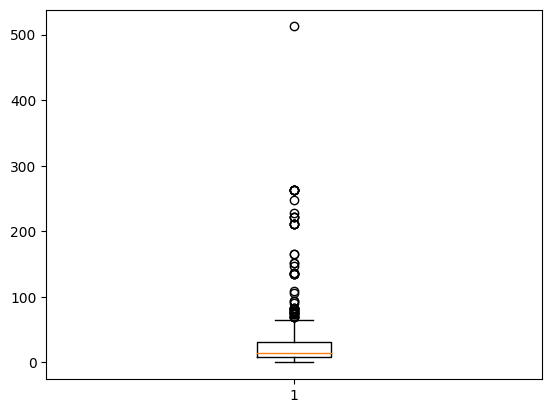

In [6]:
data=data.drop(columns='Cabin')

data=data.set_index('PassengerId')
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
plt.boxplot(data['Fare'])

#Data Cleaning

In [7]:
data[data['Fare']>=300]
data.drop(index=1235)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S


In [8]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

<ipython-input-9-fa9341fa74d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(data['Age']))


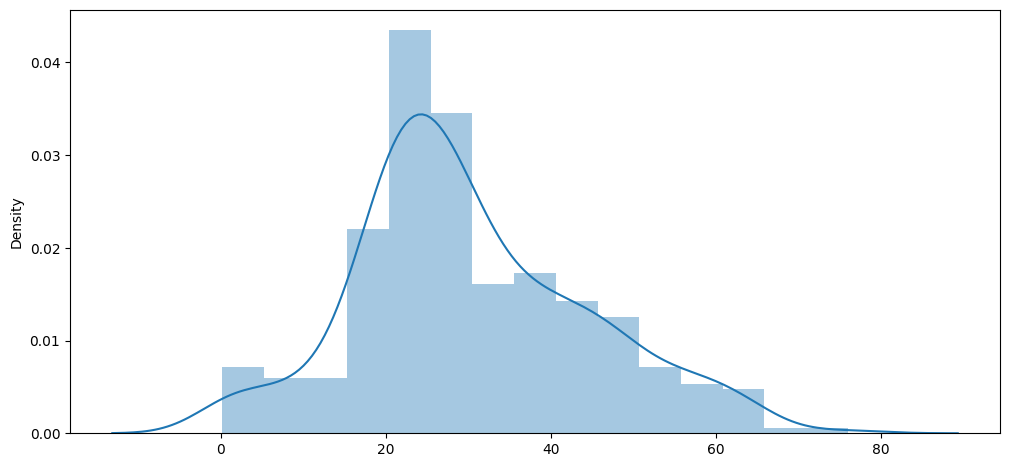

In [9]:
plt.figure(figsize=(12, 5.5))
sns.distplot(np.array(data['Age']))
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

h1=data[data["Age"].notna()]
h1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 892 to 1307
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  332 non-null    int64  
 1   Pclass    332 non-null    int64  
 2   Name      332 non-null    object 
 3   Sex       332 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     332 non-null    int64  
 6   Parch     332 non-null    int64  
 7   Ticket    332 non-null    object 
 8   Fare      332 non-null    float64
 9   Embarked  332 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 28.5+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(h1['Embarked'])
w=enc.fit_transform(h1['Sex'])
z=np.array([y,w,h1.loc[:,'Fare']]).T
lr.fit(z,h1['Age'])

LinearRegression()

In [13]:
h2=data[data["Age"].isna()]
h2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 902 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  86 non-null     int64  
 1   Pclass    86 non-null     int64  
 2   Name      86 non-null     object 
 3   Sex       86 non-null     object 
 4   Age       0 non-null      float64
 5   SibSp     86 non-null     int64  
 6   Parch     86 non-null     int64  
 7   Ticket    86 non-null     object 
 8   Fare      86 non-null     float64
 9   Embarked  86 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.4+ KB


In [14]:
y = enc.fit_transform(h2['Embarked'])
w=enc.fit_transform(h2['Sex'])
z=np.array([y,w,h2.loc[:,'Fare']]).T
h2['Age']=lr.predict(z)

<ipython-input-14-e7952c9ee032>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['Age']=lr.predict(z)


In [15]:
h2['Age']

PassengerId
902     27.853987
914     27.576310
921     31.486450
925     26.959194
928     25.804907
          ...    
1300    27.079906
1302    27.082095
1305    27.865545
1308    27.865545
1309    31.537351
Name: Age, Length: 86, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      418 non-null    float64
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 52.1+ KB


In [17]:
data['Embarked'] = enc.fit_transform(data['Embarked'])
data['Sex']=enc.fit_transform(data['Sex'])
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,2
1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,0
1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2


Splitting

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Sex','SibSp','Parch','Fare','Embarked']],
                                                     data[['Survived']],
                                                     random_state=0)

Prediction

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0